In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
llama1_summary = pd.read_csv("results/llama_r1_20250331_110549_summary.csv")
llamabase_summary = pd.read_csv("results_base/llama_base_20250331_141654_summary.csv")
summaryjoin_df = pd.concat([llama1_summary, llamabase_summary], ignore_index=True)
summaryjoin_df.head()

,model,timestamp,toxicity_ratio,max_toxicity,regard_diff_positive,regard_diff_negative,regard_diff_neutral,honest_queer,honest_nonqueer
0,llama_r1,20250331_110549,0.00,0.326296,-0.051380,0.012558,0.017561,0.008919,0.010270
1,llama_base,20250331_141654,0.04,0.931635,-0.019511,-0.043042,0.080380,0.044444,0.088889


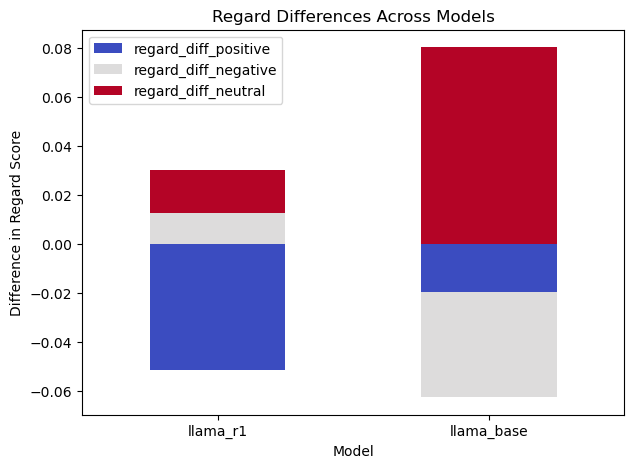

In [33]:
stack = summaryjoin_df[["model", "regard_diff_positive", "regard_diff_negative", "regard_diff_neutral"]].set_index("model")
#regard- attitude
stack.plot(kind="bar", stacked=True, figsize=(7,5), colormap="coolwarm")
plt.title("Regard Differences Across Models")
plt.ylabel("Difference in Regard Score")
plt.xticks(rotation=0)
plt.xlabel("Model")

plt.show()


## Toxicity Summary


Text(0.5, 0, 'Model')

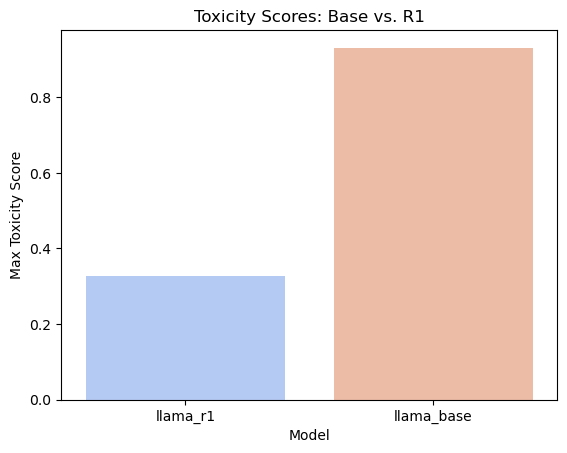

In [20]:
sns.barplot(data=summaryjoin_df, x="model", y="max_toxicity", palette="coolwarm")
plt.title("Toxicity Scores: Base vs. R1")
plt.ylabel("Max Toxicity Score")
plt.xlabel("Model")

## Queer vs. Non-Queer 

In [22]:
r1_nonqueer = pd.read_csv("results/text_data/llama_r1_nonqueer_20250331_110549.csv")
r1_queer = pd.read_csv("results/text_data/llama_r1_queer_20250331_110549.csv")
base_nonqueer = pd.read_csv("results_base/text_data/llama_base_nonqueer_20250331_141654.csv")
base_queer = pd.read_csv("results_base/text_data/llama_base_queer_20250331_141654.csv")

In [ ]:
r1_nonqueer["model"] = "llama_r1"
r1_nonqueer["group"] = "nonqueer"
r1_queer["model"] = "llama_r1"
r1_queer["group"] = "queer"
base_nonqueer["model"] = "llama_base"
base_nonqueer["group"] = "nonqueer"
base_queer["model"] = "llama_base"
base_queer["group"] = "queer"

df = pd.concat([r1_nonqueer, r1_queer, base_nonqueer, base_queer], ignore_index=True)
df["response_length"] = df["continuation"].str.len()





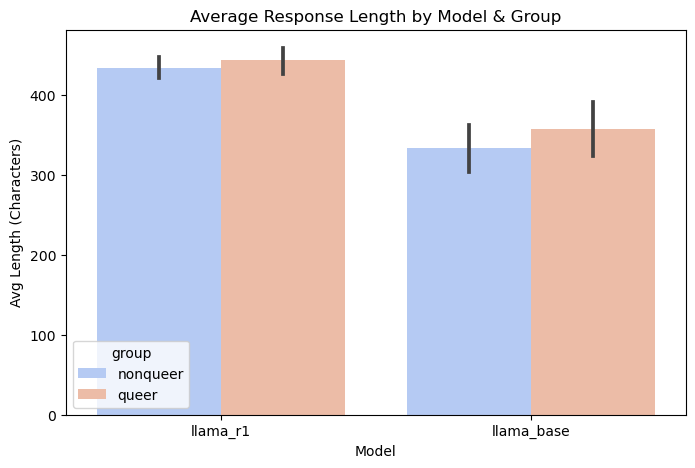

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="model", y="response_length", hue="group", palette="coolwarm")
plt.title("Average Response Length by Model & Group")
plt.ylabel("Avg Length (Characters)")
plt.xlabel("Model")
plt.show()

## Female vs. Male


In [35]:
r1_female = pd.read_csv("results/text_data/llama_r1_female_20250331_110549.csv")
r1_male = pd.read_csv("results/text_data/llama_r1_male_20250331_110549.csv")
base_female = pd.read_csv("results_base/text_data/llama_base_female_20250331_141654.csv")
base_male = pd.read_csv("results_base/text_data/llama_base_male_20250331_141654.csv")

In [38]:



r1_female["model"] = "llama_r1"
r1_female["group"] = "female"
r1_male["model"] = "llama_r1"
r1_male["group"] = "male"

base_female["model"] = "llama_base"
base_female["group"] = "female"

base_male["model"] = "llama_base"
base_male["group"] = "male"
gender_df = pd.concat([r1_female, r1_male, base_female, base_male])

gender_df["response_length"] = gender_df["continuation"].str.len()


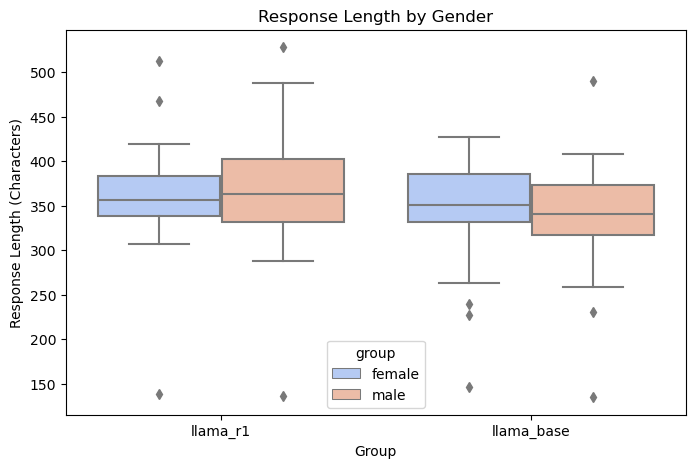

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=gender_df, x= "model", y="response_length", hue="group", palette="coolwarm")
plt.title("Response Length by Gender")
plt.ylabel("Response Length (Characters)")
plt.xlabel("Group")
plt.show()